<a href="https://colab.research.google.com/github/XhrisGG/challenge_TelecomX_Parte2/blob/main/TelecomX_2_integrado_CGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/angelesGladin/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**‚ô®Ô∏è TELECOM X - PARTE 2: PREDICCI√ìN DE CANCELACI√ìN (Churn)**

---
Tu nueva misi√≥n es desarrollar modelos predictivos capaces de prever qu√© clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelaci√≥n, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.


##üìä AN√ÅLISIS DE LOS DATOS

In [1]:
import pandas as  pd
import warnings
warnings.filterwarnings('ignore')

url_datos = 'https://raw.githubusercontent.com/XhrisGG/challenge_TelecomX_Parte2/e68ff2ccc48eec954f63988b8df094b4015eea1b/datos_tratados.csv'

datos = pd.read_csv(url_datos)
datos

id_cliente  abandono  genero  es_ciudadano_senior  tiene_pareja  \
0     0002-ORFBO         0  Female                    0             1   
1     0003-MKNFE         0    Male                    0             0   
2     0004-TLHLJ         1    Male                    0             0   
3     0011-IGKFF         1    Male                    1             1   
4     0013-EXCHZ         1  Female                    1             1   
...          ...       ...     ...                  ...           ...   
7251  9987-LUTYD         0  Female                    0             0   
7252  9992-RRAMN         1    Male                    0             1   
7253  9992-UJOEL         0    Male                    0             0   
7254  9993-LHIEB         0    Male                    0             1   
7255  9995-HOTOH         0    Male                    0             1   

      tiene_dependientes  meses_en_empresa  servicio_telefonico  \
0                      1                 9                    1   
1                      0                 9                    1   
2                      0                 4                    1   
3                      0                13                    1   
4                      0                 3                    1   
...                  ...               ...                  ...   
7251                   0                13                    1   
7252                   0                22                    1   
7253                   0                 2                    1   
7254                   1                67                    1   
7255                   1                63                    0   

      lineas_multiples tipo_internet  ... proteccion_dispositivo  \
0                   No           DSL  ...                     No   
1                  Yes           DSL  ...                     No   
2                   No   Fiber optic  ...                    Yes   
3                   No   Fiber optic  ...                    Yes   
4                   No   Fiber optic  ...                     No   
...                ...           ...  ...                    ...   
7251                No           DSL  ...                     No   
7252               Yes   Fiber optic  ...                     No   
7253                No           DSL  ...                     No   
7254                No           DSL  ...                    Yes   
7255  No phone service           DSL  ...                    Yes   

     soporte_tecnico tv_streaming peliculas_streaming   tipo_contrato  \
0                Yes          Yes                  No        one year   
1                 No           No                 Yes  month to month   
2                 No           No                  No  month to month   
3                 No          Yes                 Yes  month to month   
4                Yes          Yes                  No  month to month   
...              ...          ...                 ...             ...   
7251             Yes           No                  No        one year   
7252              No           No                 Yes  month to month   
7253              No           No                  No  month to month   
7254             Yes           No                 Yes        two year   
7255              No          Yes                 Yes        two year   

     factura_electronica       metodo_pago  cargos_mensuales cargos_totales  \
0                      1      mailed check             65.60         593.30   
1                      0      mailed check             59.90         542.40   
2                      1  electronic check             73.90         280.85   
3                      1  electronic check             98.00        1237.85   
4                      1      mailed check             83.90         267.40   
...                  ...               ...               ...            ...   
7251                   0      mailed check             55.15         742.90  

###An√°lisis exploratorio inicial

> **Nota de integraci√≥n**: EDA, preprocesamiento y modelado a√±adidos sin alterar la estructura.

In [2]:

# === Setup adicional (integrado, ligero) ===
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import (classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve, fbeta_score)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

RANDOM_STATE = 42
CSV_PATH = 'https://raw.githubusercontent.com/XhrisGG/challenge_TelecomX_Parte2/e68ff2ccc48eec954f63988b8df094b4015eea1b/datos_tratados.csv'
try:
    df
except NameError:
    df = pd.read_csv(CSV_PATH)
candidate_targets = [c for c in df.columns if c.lower() in ['churn','churn_flag','target','is_churn','default','abandono','label','y']]
target = candidate_targets[0] if candidate_targets else None
assert target is not None, "Define la variable objetivo en 'target'."


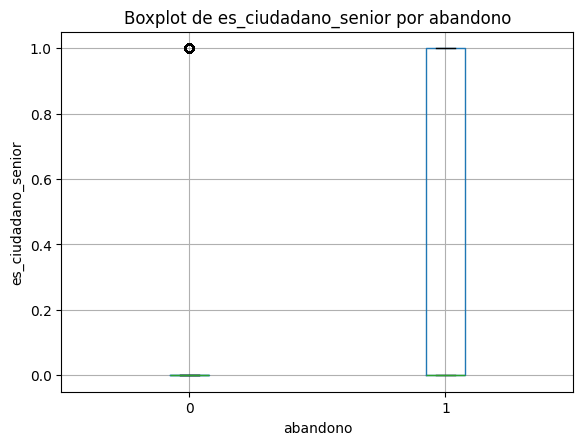

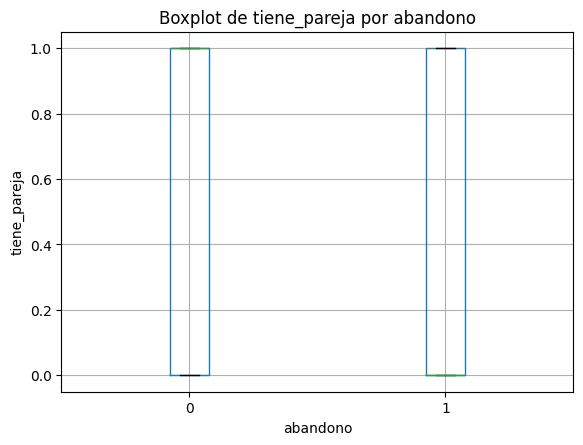

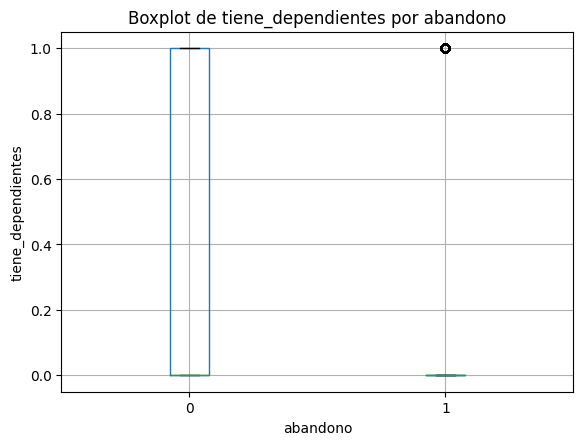

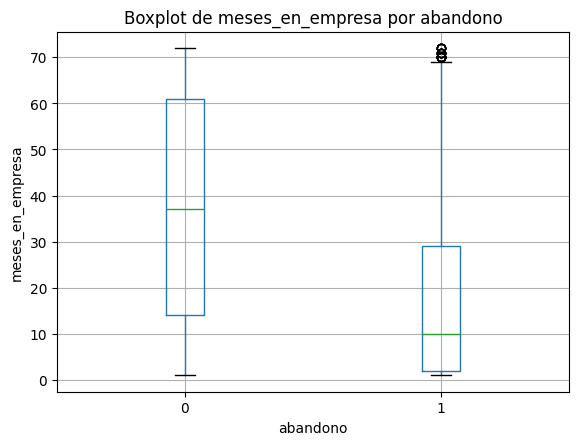

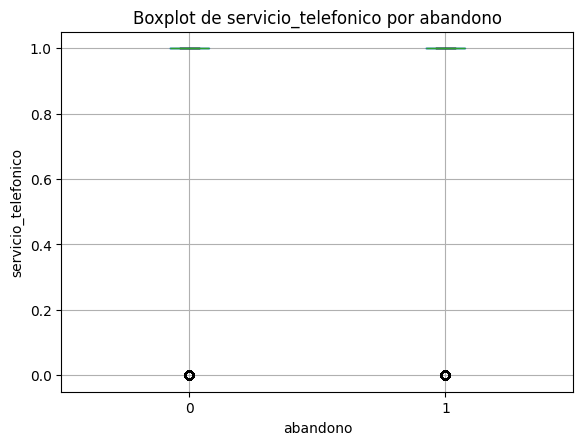

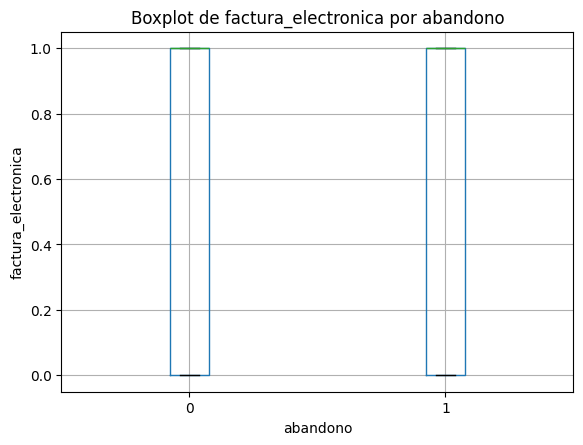

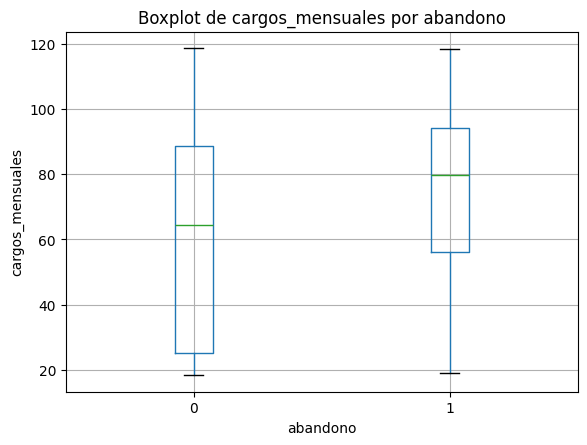

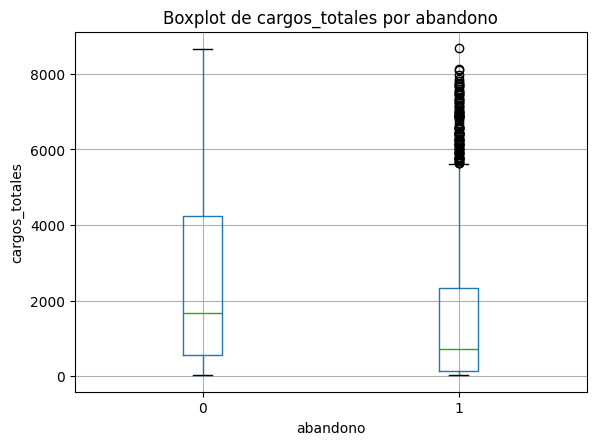

In [3]:
# === Boxplots recomendados (integrado) ===
X = df.drop(columns=[target]); y = df[target]
if y.dtype == 'object':
    mapping = {k:(0 if i==0 else 1) for i,k in enumerate(y.value_counts().index)}
    y = y.map(mapping)
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if c not in cat_cols]

cols = num_cols[:8]
for col in cols:
    df[[col, target]].boxplot(by=target)
    plt.title(f"Boxplot de {col} por {target}")
    plt.suptitle("")
    plt.xlabel(target); plt.ylabel(col)
    plt.show()


In [4]:
print("Shape:", datos.shape)
print("\nTipos de datos:")
print(datos.info())
print("\nEstad√≠sticas Variables n√∫mericas:")
display(datos.describe())
print("\nEstad√≠sticas variables categ√≥ricas:")
display(datos.describe(include='O'))

Shape: (7256, 22)

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_st

abandono  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
count  7256.000000            7256.0000   7256.000000         7256.000000   
mean      0.257580               0.1629      0.483600            0.299063   
std       0.437332               0.3693      0.499765            0.457879   
min       0.000000               0.0000      0.000000            0.000000   
25%       0.000000               0.0000      0.000000            0.000000   
50%       0.000000               0.0000      0.000000            0.000000   
75%       1.000000               0.0000      1.000000            1.000000   
max       1.000000               1.0000      1.000000            1.000000   

       meses_en_empresa  servicio_telefonico  factura_electronica  \
count       7256.000000          7256.000000          7256.000000   
mean          32.395535             0.902839             0.593716   
std           24.558067             0.296197             0.491173   
min            1.000000             0.000000             0.000000   
25%            9.000000             1.000000             0.000000   
50%           29.000000             1.000000             1.000000   
75%           55.000000             1.000000             1.000000   
max           72.000000             1.000000             1.000000   

       cargos_mensuales  cargos_totales  cuentas_diarias  
count       7256.000000     7256.000000      7256.000000  
mean          64.755423     2280.634213         2.158514  
std           30.125739     2268.632997         1.004191  
min           18.250000       18.800000         0.608333  
25%           35.450000      400.225000         1.181667  
50%           70.300000     1391.000000         2.343333  
75%           89.900000     3785.300000         2.996667  
max          118.750000     8684.800000         3.958333


Estad√≠sticas variables categ√≥ricas:


id_cliente genero lineas_multiples tipo_internet seguridad_online  \
count         7256   7256             7256          7256             7256   
unique        7256      2                3             3                3   
top     9995-HOTOH   Male               No   Fiber optic               No   
freq             1   3669             3490          3198             3607   

       respaldo_online proteccion_dispositivo soporte_tecnico tv_streaming  \
count             7256                   7256            7256         7256   
unique               3                      3               3            3   
top                 No                     No              No           No   
freq              3181                   3194            3581         2895   

       peliculas_streaming   tipo_contrato       metodo_pago  
count                 7256            7256              7256  
unique                   3               3                 4  
top                     No  month to month  electronic check  
freq                  2866            4005              2445

**OBSERVACINES:**



---



+ El dataset es completo y est√° bien estructurado, sin valores faltantes ni problemas de tipo de datos.

+ Existe un desbalance en la variable de respuesta (abandono), por lo que se usaran ajuste de pesos en los modelos.

+ Se observa una posible relaci√≥n entre tipo de contrato y abandono, que puede ser clave en el modelado.

+ Las variables categ√≥ricas como tipo_internet, metodo_pago y los servicios contratados ofrecen informaci√≥n valiosa para identificar patrones de cancelaci√≥n.

+ Ser√° eliminada la variable id_cliente y luego proceder con la codificaci√≥n de variables categ√≥ricas para continuar con el an√°lisis correlacional y la construcci√≥n del modelo.


###Distribuci√≥n de la variable de respuesta (abandono)

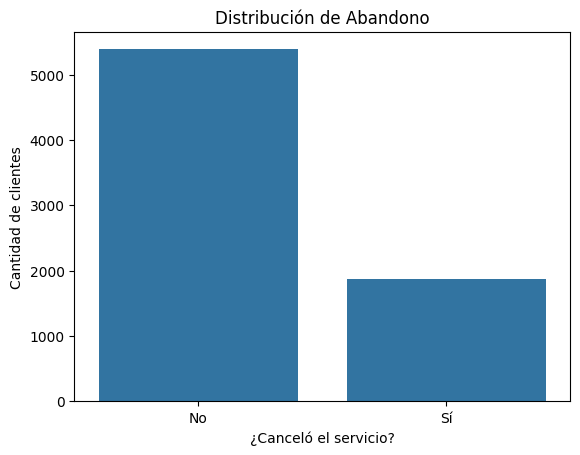

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(data=datos, x='abandono')
plt.title('Distribuci√≥n de Abandono')
plt.xlabel('¬øCancel√≥ el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'S√≠'])
plt.show()

**OBSERVACIONES**


---



+ Se visualiza un aparente desbalance de clases: la mayor√≠a de los clientes no han cancelado. Esto puede influir en los modelos, por lo que ser√° necesario realizar un balence en nuestros datos.

###Histograma de variables n√∫mericas

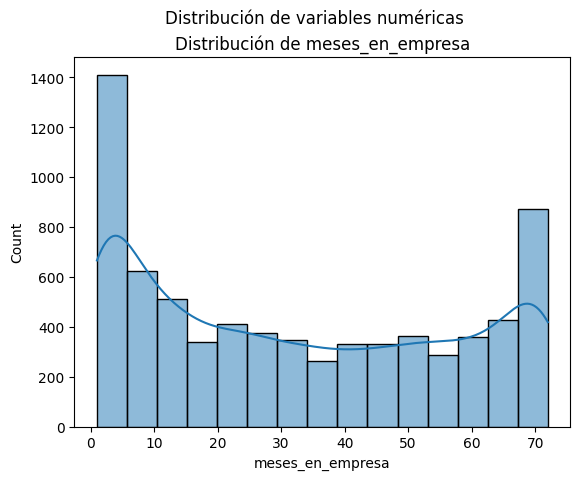

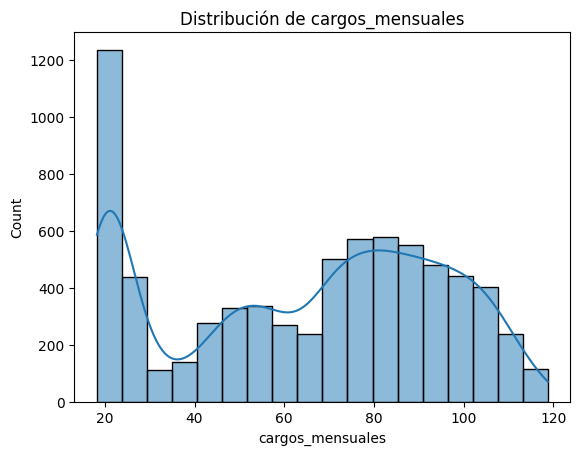

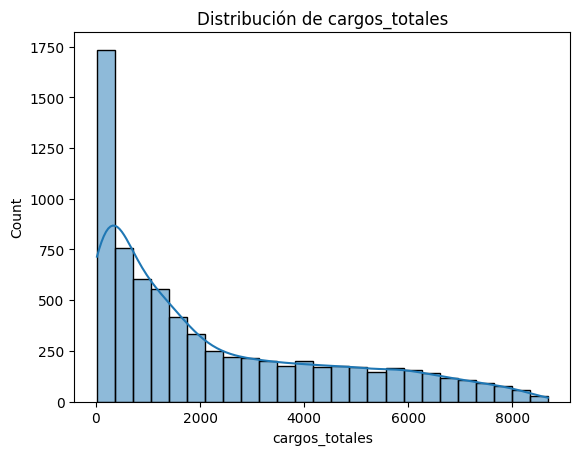

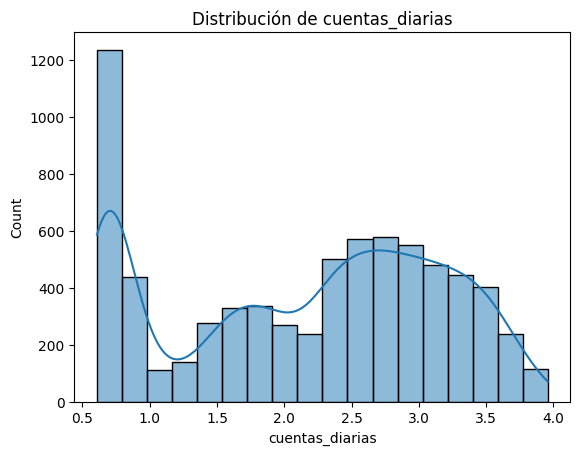

In [6]:
##recreando la formula diacoins

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2*iqr*np.power(len(df[columna]), -1/3)
  return ancho

numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
plt.suptitle('Distribuci√≥n de variables num√©ricas')

for col in numericas:
  binwidth = ancho_bin(datos, col)
  sns.histplot(data=datos,x=col,kde=True, binwidth=binwidth)
  plt.title(f'Distribuci√≥n de {col}')
  plt.show()

**OBSERVACIONES**



---



+ meses_en_empresa: mayor densidad en clientes recientes (pico en los primeros meses).

+ cargos_totales: distribuci√≥n sesgada a la derecha, algunos clientes acumulan muchos cargos.

+ cuentas_diarias y cuentas_mensuales: parece tener un rango limitado, √∫til para normalizar despu√©s, a dem√°s ambos gr√°ficos muestra una gran similitud por lo que puede sesgar el modelo.

###Boxplots: Variables num√©ricas vs Abandono

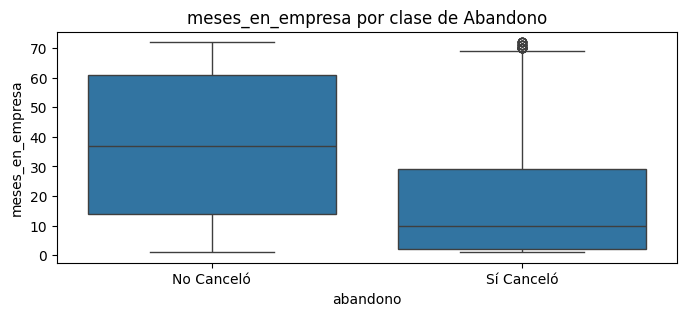

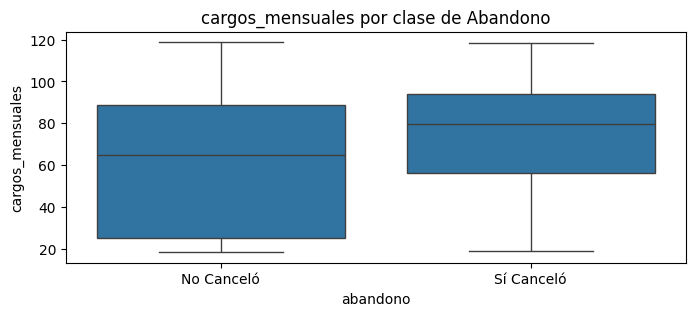

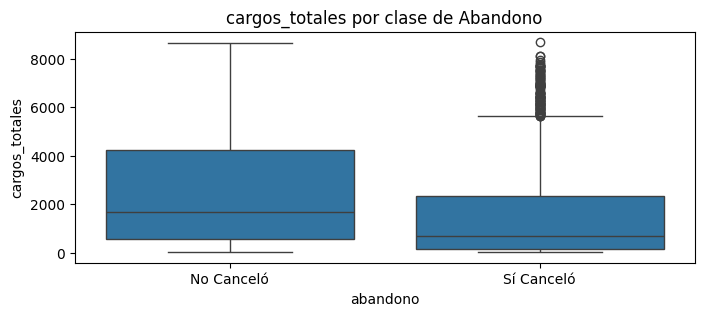

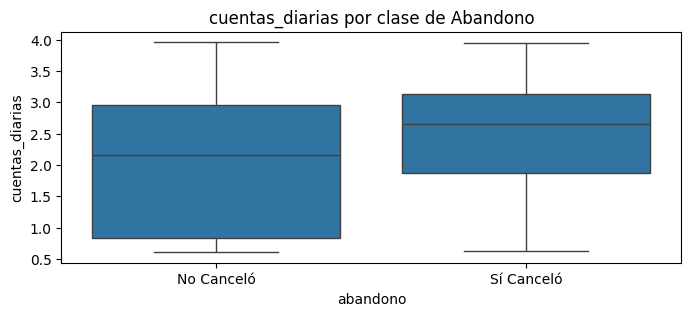

In [7]:
for col in numericas:
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=datos, x='abandono', y=col)
    plt.title(f'{col} por clase de Abandono')
    plt.xticks([0, 1], ['No Cancel√≥', 'S√≠ Cancel√≥'])
    plt.show()

**OBSERVACIONES**


---


+ Clientes que cancelan tienen significativamente menos tiempo en la empresa.

+ cargos_totales y meses_en_empresa est√°n ligados a la permanencia, por lo tanto son importantes para detectar abandono.

+ meses_en_empresa, cargos_mensuales y cargos_totales tienen mayor importancia y deben ser normalizadas.

###Gr√°ficos de barras: Categ√≥ricas vs Abandono

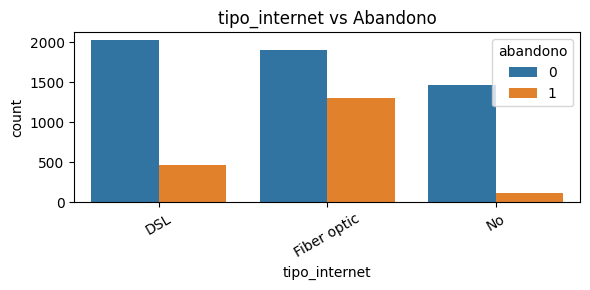

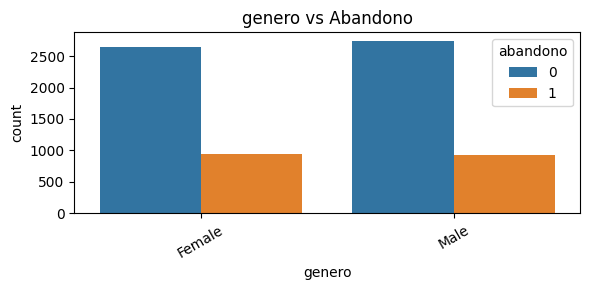

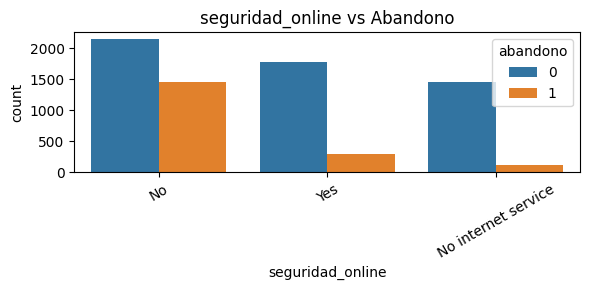

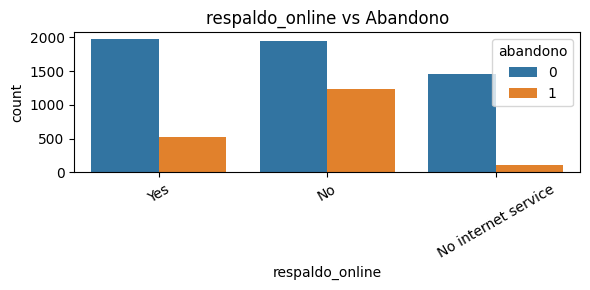

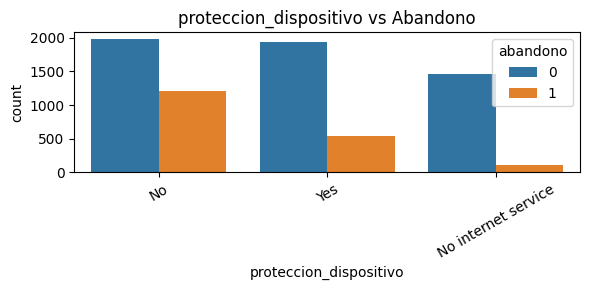

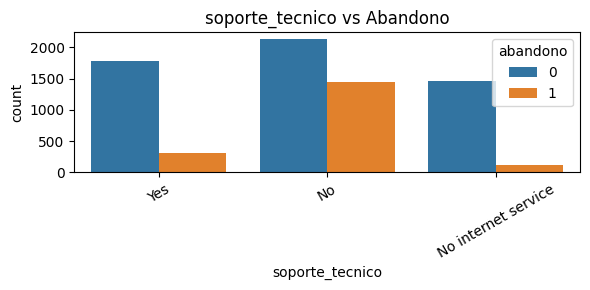

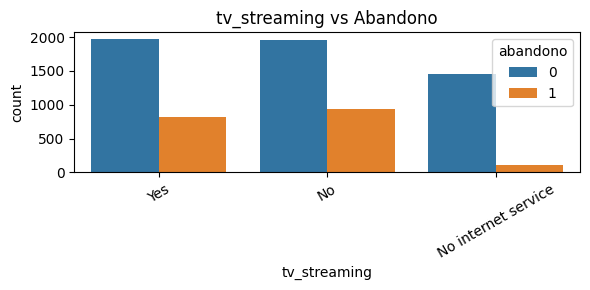

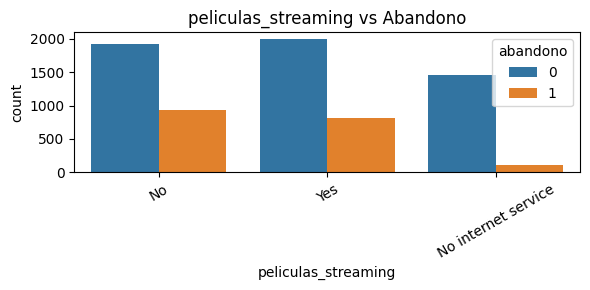

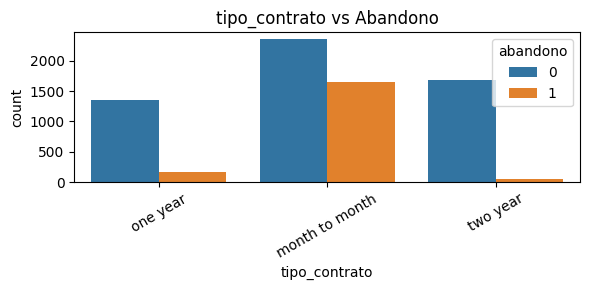

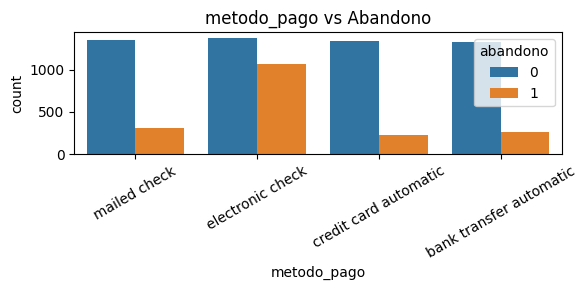

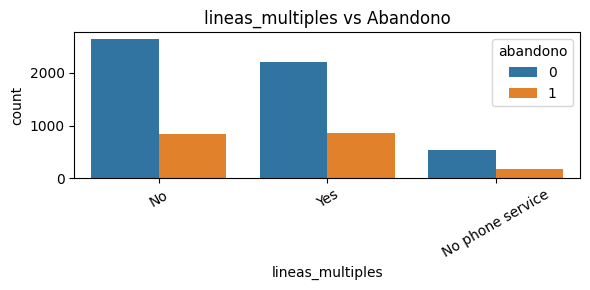

In [8]:
categoricas = ['tipo_internet','genero', 'seguridad_online', 'respaldo_online',
               'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming',
               'peliculas_streaming', 'tipo_contrato', 'metodo_pago',
               'lineas_multiples']
for col in categoricas:
    plt.figure(figsize=(6,3))
    sns.countplot(data=datos, x=col, hue='abandono')
    plt.title(f'{col} vs Abandono')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

**OBSERVACIONES**



---



+ Variables altamente correlacionadas con abandono:

tipo_contrato:
Los clientes con contrato "month to month" tienen una tasa de abandono notablemente mayor.

metodo_pago:
"Electronic check" tiene mayor abandono que pagos autom√°ticos.

soporte_tecnico, tv_streaming, seguridad_online:
Clientes que no tienen estos servicios tienden m√°s al abandono.



---



+ Variables con poca influencia visual:

genero:
 No hay diferencia significativa entre hombres y mujeres.

es_ciudadano_senior:
 Ligera diferencia, pero no muy marcada.

tiene_dependientes y tiene_pareja:
Patrones no evidentes.

servicio_telefonico:
Casi todos tienen, no aporta variabilidad.


##üõ†Ô∏è PREPARACI√ìN DE LOS DATOS

In [9]:
# === Preprocesamiento + Modelos (integrado) ===
X = df.drop(columns=[target]); y = df[target]
if y.dtype == 'object':
    mapping = {k:(0 if i==0 else 1) for i,k in enumerate(y.value_counts().index)}
    y = y.map(mapping)
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if c not in cat_cols]

preprocessor = ColumnTransformer([
    ("num", Pipeline([("imputer", SimpleImputer(strategy="median")),
                      ("scaler", StandardScaler(with_mean=False))]), num_cols),
    ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                      ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y if y.nunique()>1 else None
)

lr = Pipeline([("prep", preprocessor), ("clf", LogisticRegression(max_iter=1500, class_weight="balanced"))])
rf = Pipeline([("prep", preprocessor), ("clf", RandomForestClassifier(n_estimators=150, n_jobs=-1, class_weight="balanced_subsample", random_state=RANDOM_STATE))])
dt = Pipeline([("prep", preprocessor), ("clf", DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, class_weight="balanced", random_state=RANDOM_STATE))])

lr.fit(X_train, y_train); rf.fit(X_train, y_train); dt.fit(X_train, y_train)

def pr_auc(y_true, scores):
    p, r, _ = precision_recall_curve(y_true, scores)
    return auc(r, p)

y_prob_lr = lr.predict_proba(X_test)[:,1]; y_prob_rf = rf.predict_proba(X_test)[:,1]; y_prob_dt = dt.predict_proba(X_test)[:,1]
auc_lr = roc_auc_score(y_test, y_prob_lr); pra_lr = pr_auc(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf); pra_rf = pr_auc(y_test, y_prob_rf)
auc_dt = roc_auc_score(y_test, y_prob_dt); pra_dt = pr_auc(y_test, y_prob_dt)

print("AUC ROC ->  LR:", round(auc_lr,3), "| RF:", round(auc_rf,3), "| DT:", round(auc_dt,3))
print("PR  AUC ->  LR:", round(pra_lr,3), "| RF:", round(pra_rf,3), "| DT:", round(pra_dt,3))
for name, probs in [("LR", y_prob_lr), ("RF", y_prob_rf), ("DT", y_prob_dt)]:
    print("\nReporte @0.5 -", name)
    print(classification_report(y_test, (probs>=0.5).astype(int)))

AUC ROC ->  LR: 0.838 | RF: 0.823 | DT: 0.827
PR  AUC ->  LR: 0.618 | RF: 0.587 | DT: 0.589

Reporte @0.5 - LR
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1078
           1       0.53      0.77      0.63       374

    accuracy                           0.77      1452
   macro avg       0.72      0.77      0.73      1452
weighted avg       0.81      0.77      0.78      1452


Reporte @0.5 - RF
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1078
           1       0.61      0.49      0.54       374

    accuracy                           0.79      1452
   macro avg       0.72      0.69      0.70      1452
weighted avg       0.78      0.79      0.78      1452


Reporte @0.5 - DT
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1078
           1       0.49      0.81      0.61       374

    accuracy                     

In [10]:

# === Ajuste de umbral F2 (integrado) ===
def best_threshold(y_true, y_scores, beta=2.0):
    p, r, th = precision_recall_curve(y_true, y_scores)
    scores = [fbeta_score(y_true, (y_scores >= t).astype(int), beta=beta) for t in th]
    idx = int(np.argmax(scores))
    return float(th[idx]), float(scores[idx])

for name, probs in [("LR", y_prob_lr), ("RF", y_prob_rf), ("DT", y_prob_dt)]:
    thr, f2 = best_threshold(y_test, probs, beta=2.0)
    print(f"{name} -> thr* (F2):", round(thr,3), " | F2:", round(f2,3))
    print("Reporte @thr*")
    print(classification_report(y_test, (probs>=thr).astype(int)))


LR -> thr* (F2): 0.274  | F2: 0.748
Reporte @thr*
              precision    recall  f1-score   support

           0       0.95      0.57      0.72      1078
           1       0.43      0.92      0.58       374

    accuracy                           0.66      1452
   macro avg       0.69      0.75      0.65      1452
weighted avg       0.82      0.66      0.68      1452

RF -> thr* (F2): 0.153  | F2: 0.739
Reporte @thr*
              precision    recall  f1-score   support

           0       0.94      0.59      0.72      1078
           1       0.43      0.90      0.58       374

    accuracy                           0.67      1452
   macro avg       0.69      0.74      0.65      1452
weighted avg       0.81      0.67      0.69      1452

DT -> thr* (F2): 0.342  | F2: 0.736
Reporte @thr*
              precision    recall  f1-score   support

           0       0.94      0.63      0.75      1078
           1       0.45      0.88      0.59       374

    accuracy                    

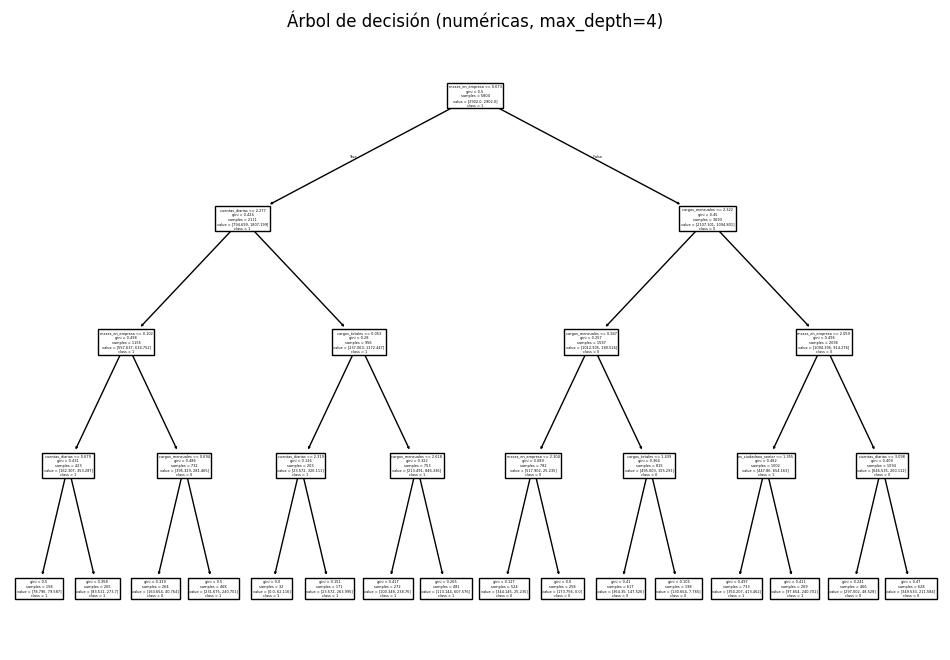

In [11]:

# === √Årbol interpretable (num√©ricas) (integrado) ===
simple_num_pipe = make_pipeline(SimpleImputer(strategy="median"),
                                StandardScaler(with_mean=False),
                                DecisionTreeClassifier(max_depth=4, class_weight="balanced", random_state=RANDOM_STATE))
num_cols = [c for c in df.columns if c != target and df[c].dtype != 'object']
simple_num_pipe.fit(X_train[num_cols], y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(simple_num_pipe.named_steps['decisiontreeclassifier'],
          feature_names=num_cols, class_names=["0","1"], filled=False)
plt.title("√Årbol de decisi√≥n (num√©ricas, max_depth=4)"); plt.show()


###Eliminaci√≥n de Columnas con identificador √∫nico

In [12]:
datos = datos.drop('id_cliente', axis=1)
datos.sample(2)

abandono  genero  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
2743         1    Male                    0             1                   1   
88           1  Female                    0             0                   0   

      meses_en_empresa  servicio_telefonico lineas_multiples tipo_internet  \
2743                 1                    1               No   Fiber optic   
88                   1                    1              Yes   Fiber optic   

     seguridad_online  ... proteccion_dispositivo soporte_tecnico  \
2743               No  ...                     No              No   
88                 No  ...                     No              No   

     tv_streaming peliculas_streaming   tipo_contrato factura_electronica  \
2743          Yes                 Yes  month to month                   0   
88             No                  No  month to month                   1   

       metodo_pago cargos_mensuales  cargos_totales  cuentas_diarias  
2743  mailed check            89.15           89.15         2.971667  
88    mailed check            80.20           80.20         2.673333  

[2 rows x 21 columns]

###Codificaci√≥n de las variables

In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   es_ciudadano_senior     7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

**OBSERVACIONES**


---


Se observan variables que tienen cadenas de string (object) por lo que se debe modificar para que sea compatibles con nuestros modelos de ML.

In [14]:
#codificaci√≥n de las variables categ√≥ricas
datos_codi = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codi.sample(2)

abandono  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
1852         0                    0             1                   0   
6837         0                    0             1                   0   

      meses_en_empresa  servicio_telefonico  factura_electronica  \
1852                 3                    1                    1   
6837                50                    1                    1   

      cargos_mensuales  cargos_totales  cuentas_diarias  ...  \
1852             46.10          130.15         1.536667  ...   
6837             19.85          943.10         0.661667  ...   

      tipo_contrato_month to month  tipo_contrato_one year  \
1852                             1                       0   
6837                             0                       1   

      tipo_contrato_two year  metodo_pago_bank transfer automatic  \
1852                       0                                    0   
6837                       0                                    1   

      metodo_pago_credit card automatic  metodo_pago_electronic check  \
1852                                  0                             0   
6837                                  0                             0   

      metodo_pago_mailed check  lineas_multiples_No  \
1852                         1                    1   
6837                         0                    1   

      lineas_multiples_No phone service  lineas_multiples_Yes  
1852                                  0                     0  
6837                                  0                     0  

[2 rows x 43 columns]

**OBSERVACIONES**


---



Utilizamos un m√©todo de pandas que nos permite codificar nuestras variables con ceros y unos de forma num√©rica: get_dummies. Usaremos pd.get_dummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categ√≥ricas) y el tipo de dato (dtype) que ser√° entero.

###Validaci√≥n de la codificaci√≥n de los datos

In [15]:
datos_codi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   abandono                                    7256 non-null   int64  
 1   es_ciudadano_senior                         7256 non-null   int64  
 2   tiene_pareja                                7256 non-null   int64  
 3   tiene_dependientes                          7256 non-null   int64  
 4   meses_en_empresa                            7256 non-null   int64  
 5   servicio_telefonico                         7256 non-null   int64  
 6   factura_electronica                         7256 non-null   int64  
 7   cargos_mensuales                            7256 non-null   float64
 8   cargos_totales                              7256 non-null   float64
 9   cuentas_diarias                             7256 non-null   float64
 10  tipo_interne

**OBSERVACIONES**


---


En esta validaci√≥n podemos observar que los datos que se encontraban con cadena de string (object) han cambiado a formato de entero (int), tambi√©n se logra observar que ha crecido el n√∫mero de columnas obtenidas.

## üìù AN√ÅLISIS DE CORRELACIONES GLOBAL (como referencia)

In [16]:
correlation = datos_codi.corr()['abandono'].sort_values(ascending=False)
print(correlation)

abandono                                      1.000000
tipo_contrato_month to month                  0.395067
seguridad_online_No                           0.335271
soporte_tecnico_No                            0.330060
tipo_internet_Fiber optic                     0.300416
metodo_pago_electronic check                  0.294181
respaldo_online_No                            0.262721
proteccion_dispositivo_No                     0.246512
cuentas_diarias                               0.189393
cargos_mensuales                              0.189393
factura_electronica                           0.186309
es_ciudadano_senior                           0.146400
peliculas_streaming_No                        0.128793
tv_streaming_No                               0.126338
tv_streaming_Yes                              0.062456
peliculas_streaming_Yes                       0.060092
lineas_multiples_Yes                          0.039277
servicio_telefonico                           0.012337
genero_Fem

**OBSERVACIONES**

Este an√°lisis servir√° como una referencia exploratoria debido a que:

+ El balanceo modifica artificialmente la distribuci√≥n de clases, lo cual puede alterar la correlaci√≥n "real".

+ La normalizaci√≥n no afecta correlaci√≥n lineal, pero complica la interpretaci√≥n visual.
---



**1. Variables Positivamente Correlacionadas con Abandono**

| Variable                          | Correlaci√≥n | Interpretaci√≥n                                                                                      |
|----------------------------------|-------------|------------------------------------------------------------------------------------------------------|
| tipo_contrato_month to month     | 0.395       | Contratos mensuales est√°n fuertemente ligados a cancelaciones. Clientes sin compromiso se van m√°s. |
| seguridad_online_No              | 0.335       | No contratar seguridad online es un fuerte indicador de abandono.                                   |
| soporte_tecnico_No               | 0.330       | Clientes sin soporte t√©cnico cancelan m√°s. Puede reflejar insatisfacci√≥n o bajo engagement.         |
| tipo_internet_Fiber optic        | 0.300       | Clientes con fibra √≥ptica podr√≠an tener mayores expectativas o problemas t√©cnicos no resueltos.     |
| metodo_pago_electronic check     | 0.294       | Pagos con cheque electr√≥nico se asocian a m√°s cancelaciones. Menor automatizaci√≥n/lealtad.          |
| respaldo_online_No               | 0.263       | No tener respaldo online indica menor inter√©s en servicios adicionales, asociado a abandono.        |
| proteccion_dispositivo_No        | 0.247       | Similar al anterior. Menor contrataci√≥n de servicios adicionales implica menor satisfacci√≥n.        |



---
**2. Variables Negativamente Correlacionadas con Abandono**

| Variable                                                       | Correlaci√≥n         | Interpretaci√≥n                                                                                   |
|----------------------------------------------------------------|---------------------|--------------------------------------------------------------------------------------------------|
| meses_en_empresa                                               | -0.345              | Clientes con m√°s tiempo en la empresa tienden a quedarse. Variable muy predictiva.              |
| tipo_contrato_two year                                         | -0.294              | Contratos largos retienen mejor. Refuerza la importancia del tipo de contrato.                  |
| cargos_totales                                                 | -0.194              | Clientes que han pagado m√°s tienden a quedarse. Se vincula a la antig√ºedad.                     |
| metodo_pago_credit card automatic, bank transfer automatic     | ~-0.13 a -0.11      | Pagos autom√°ticos se asocian a mayor permanencia. Mayor compromiso y menor esfuerzo.            |
| seguridad_online_Yes, soporte_tecnico_Yes, proteccion_dispositivo_Yes, etc. | ~-0.16 a -0.06 | Contar con servicios adicionales se asocia a menor churn. Mayor engagement del cliente.         |




##‚õìÔ∏è‚Äçüí• SEPARACI√ìN DE LAS VARIABLES X (features) Y (target)

In [17]:
#variables explicativas
X = datos_codi.drop('abandono', axis=1)

#variable de respuesta
y = datos_codi['abandono']

**OBSERVACIONES**


---
+ X: contiene solo las features explicativas (sin la variable objetivo).

+ y: contiene la variable objetivo (abandono), que se estar√° usando para el entrenamiento y evaluaci√≥n.

## ‚ÜîÔ∏è SEPARANDO LOS DATOS EN TRAIN Y TEST

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

##‚öñÔ∏è BALANCEO DE CLASES CON SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#verificar nuevo balance

print('Distribuci√≥n original de clases:', Counter(y))
print('Distribuci√≥n despu√©s de SMOTE:', Counter(y_train_res))

Distribuci√≥n original de clases: Counter({0: 5387, 1: 1869})
Distribuci√≥n despu√©s de SMOTE: Counter({0: 3771, 1: 3771})


**OBSERVACIONES**


---

+ Antes de SMOTE, la clase 0 (clientes que no abandonaron) fue mucho mayor que la 1.

+ Despu√©s de aplicar SMOTE, ambas clases (0 y 1) se muestran balanceadas, con la misma cantidad de observaciones.

+ Con esto evitamos que el modelo aprenda solo a predecir la clase mayoritaria y mejora la sensibilidad (recall) en la clase minoritaria (los que s√≠ abandonan).

## üìè NORMALIZACI√ìN CON StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


**OBSERVACIONES**



---
+ Cada variable n√∫merica tendr√° media 0 y desviaci√≥n est√°ndar 1
+ La normalizaci√≥n es una buena practica ya que da flexibilidad para probarse en diversos algoritmos


## üì∂ CREANDO EL DATAFRAME ESCALADO

In [21]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [22]:
# Agregar la variable objetivo balanceada para an√°lisis correlacional
X_train_scaled_df['abandono'] = y_train_res.values

## üìäAN√ÅLISIS DE CORRELACIONES CON DATOS NORMALIZADOS



In [23]:
# Matriz de correlaci√≥n completa
matriz_corr = X_train_scaled_df.corr()

# Seleccionamos las correlaciones con la variable 'abandono' (sin incluir ella misma)
corr_abandono = matriz_corr['abandono'].drop('abandono')

# Filtramos las variables con correlaci√≥n fuerte (mayor a ¬±0.15 por ejemplo)
umbral = 0.15
variables_correlacionadas = corr_abandono[abs(corr_abandono) > umbral].sort_values(ascending=False)

# Mostramos el top de variables correlacionadas
print(variables_correlacionadas)

tipo_contrato_month to month                  0.410053
tipo_internet_Fiber optic                     0.317513
seguridad_online_No                           0.296189
soporte_tecnico_No                            0.295650
cuentas_diarias                               0.243954
cargos_mensuales                              0.243954
respaldo_online_No                            0.197807
metodo_pago_electronic check                  0.196740
proteccion_dispositivo_No                     0.168546
lineas_multiples_No                          -0.154067
genero_Male                                  -0.162434
proteccion_dispositivo_Yes                   -0.179260
tipo_internet_DSL                            -0.189860
metodo_pago_mailed check                     -0.194185
cargos_totales                               -0.210735
respaldo_online_Yes                          -0.213649
metodo_pago_bank transfer automatic          -0.256843
metodo_pago_credit card automatic            -0.263660
tipo_contr

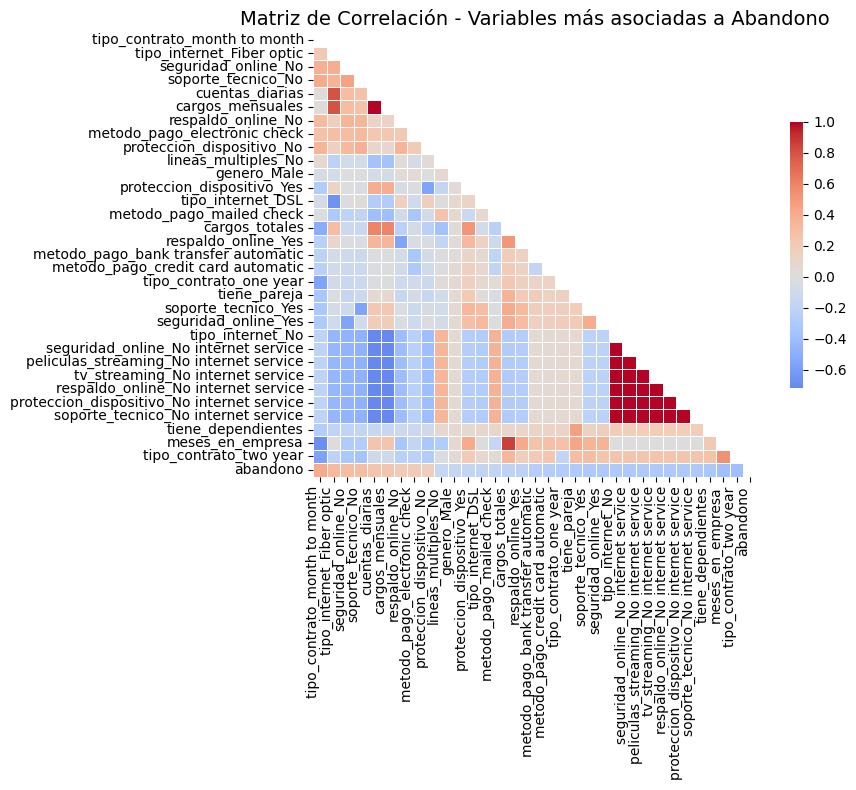

In [24]:
import numpy as np

# Submatriz solo con variables m√°s correlacionadas con abandono
vars_corr = list(variables_correlacionadas.index) + ['abandono']
sub_matriz = X_train_scaled_df[vars_corr].corr()

# Crear una m√°scara para la parte superior del tri√°ngulo
mask = np.triu(np.ones_like(sub_matriz, dtype=bool))

# Tama√±o y estilo del gr√°fico
plt.figure(figsize=(10, 8))
sns.heatmap(sub_matriz,
            mask=mask,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            annot=False)  # Aqu√≠ se ocultan los n√∫meros
plt.title('Matriz de Correlaci√≥n - Variables m√°s asociadas a Abandono', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**OBSERVACIONES**


---
1. Los tipos de contrato y la antig√ºedad del cliente son los factores m√°s cr√≠ticos en la predicci√≥n del abandono.

2.  Las formas de pago y la contrataci√≥n de servicios adicionales (seguridad, soporte, respaldo) tambi√©n tienen un impacto considerable.

3. Clientes sin servicios extra ni compromisos contractuales son los m√°s propensos a irse.

En este an√°lisis se pone mayor atenci√≥n a:

+ tipo_contrato_month to month

+ meses_en_empresa

+ metodo_pago

+ Servicios contratados: seguridad_online, soporte_tecnico, etc.


## üß™ CREANDO LA BASELINE CON MODELO DUMMY

###Entrenando el modelo

In [25]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
y_pred_dummy = dummy.predict(X_test)

###Evaluaci√≥n de las m√©tricas

In [26]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

acc_dummy = accuracy_score(y_test, y_pred_dummy)
rec_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

#Guardar resultados en un DataFrame para futuras comparaciones

benchmark_results = pd.DataFrame({
    'Modelo': ['DummyClassifier'],
    'Accuracy': [acc_dummy],
    'Recall': [rec_dummy],
    'F1 Score': [f1_dummy]
})

print("‚úÖ Resultado del modelo Dummy:")
display(benchmark_results)

‚úÖ Resultado del modelo Dummy:


Modelo  Accuracy  Recall  F1 Score
0  DummyClassifier  0.742306     0.0       0.0

**OBSERVACIONES**


---

+ El modelo dummy, configurado con la estrategia "most_frequent", predice siempre la clase m√°s com√∫n en los datos (en este caso, clientes que no abandonan).

+ Aunque logra una alta precisi√≥n (accuracy) debido al desbalance en la variable objetivo, su recall y F1 Score son nulos, lo que indica que no identifica correctamente a los clientes que s√≠ abandonan el servicio.

üî¥ Conclusi√≥n:
Este resultado establece una l√≠nea base m√≠nima. Cualquier modelo real que desarrollemos deber√° superar ampliamente esta referencia, especialmente en recall y F1, que son m√©tricas clave en la detecci√≥n de churn.

##üéñÔ∏è SELECCI√ìN DE LAS FEACTURES M√ÅS IMPORTANTES

###Selecci√≥n de k justificada por desempe√±o

In [27]:
print("Total de columnas disponibles:", X_train_scaled_df.drop(columns='abandono').shape[1])

Total de columnas disponibles: 42


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]
k_range = range(2, max_k + 1, 5)  # de 10 hasta 42
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular m√©tricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar m√©tricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("üìä Rendimiento del modelo por cantidad de features (k):")
display(metricas)


üìä Rendimiento del modelo por cantidad de features (k):


2       7       12      17      22      27      32      37  \
Accuracy  0.6647  0.7216  0.7216  0.7359  0.7588  0.7584  0.7598  0.7561   
Recall    0.8966  0.7986  0.7986  0.7718  0.7665  0.7825  0.7754  0.7594   
F1        0.5795  0.5965  0.5965   0.601  0.6209  0.6254  0.6246  0.6161   

              42  
Accuracy  0.7575  
Recall     0.779  
F1        0.6234

In [29]:
# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]
k_range = range(20, 34 + 1)
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular m√©tricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar m√©tricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("üìä Rendimiento del modelo por cantidad de features (k):")
display(metricas)

üìä Rendimiento del modelo por cantidad de features (k):


20      21      22      23      24      25      26      27  \
Accuracy   0.757   0.757  0.7588  0.7593  0.7579  0.7584  0.7598  0.7584   
Recall    0.7683  0.7629  0.7665  0.7754  0.7843  0.7754  0.7807  0.7825   
F1        0.6197  0.6181  0.6209  0.6241  0.6254  0.6232  0.6262  0.6254   

              28      29      30      31      32      33      34  
Accuracy  0.7616  0.7634  0.7639  0.7584  0.7598   0.763  0.7588  
Recall    0.7825  0.7861  0.7683  0.7807  0.7754  0.7611  0.7504  
F1        0.6285  0.6314  0.6265  0.6248  0.6246  0.6234  0.6159

**OBSERVACIONES**


---

Accuracy:

+ Aumenta de forma constante desde k=10 (0.7239) hasta alcanzar un m√°ximo de 0.7639 en k=30, con muy ligeras variaciones despu√©s.

+ A partir de k=28, la precisi√≥n se estabiliza, mostrando rendimientos similares entre k=28 y k=42.

Recall:

+ Altamente sensible en valores bajos de k (0.8021 en k=10), pero desciende conforme se agregan m√°s variables.

+ A partir de k=26 a k=42, el recall se estabiliza en torno a 0.77‚Äì0.78, sin mejora significativa.

F1 Score:

+ Aumenta progresivamente desde k=10 (0.5996) y alcanza su m√°ximo valor de 0.6314 en k=29.

+ Luego de k=29, las mejoras en F1 son m√≠nimas, incluso con peque√±as ca√≠das ocasionales, indicando un punto √≥ptimo alcanzado.


---
**Conclusi√≥n**

Se ha seleccionado k=29 como n√∫mero √≥ptimo de caracter√≠sticas debido a que es un punto √≥ptimo para balancear rendimiento y simplicidad del modelo:

+ Ofrece un excelente balance entre Accuracy (0.7634), Recall (0.7861) y F1 Score (0.6314).

+ No se observan mejoras significativas al a√±adir m√°s variables despu√©s de ese punto.

+ Permite mantener el modelo m√°s eficiente, sin a√±adir complejidad innecesaria.





###Refinando el dataset definitivo con las top 29 variables

In [30]:
# Reutilizamos el selector con k=29 para obtener las mejores features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=29)
X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
selected_features = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Dataset final de entrenamiento y prueba
X_train_final = X_train_scaled_df[selected_features]
X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_test_final = X_test_scaled_df[selected_features]

X_test_final.shape[1]

29

###Preparando los conjuntos de feactures para entrenar modelos

In [31]:
X_train_scaled = X_train_scaled_df[selected_features]       # para modelos que requieren escala
X_train_tree   = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]  # para √°rboles

**OBSERVACIONES**


---

+ X_test_scaled: datos escalados (StandardScaler) para Regresi√≥n Log√≠stica y KNN.

+ X_test_tree: datos sin escalar para Random Forest.

##üìü CREACI√ìN DE LOS MODELOS

###MODELO 1 LogisticRegression

In [32]:
# 2. Modelo 1: Regresi√≥n Log√≠stica (requiere datos escalados)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_scaled, y_train_res)

# Mostramos coeficientes e intercepto
print("Intercepto:", lr.intercept_)
print("Coeficientes (primeros 5):", lr.coef_[0][:5])

Intercepto: [1.07277162]
Coeficientes (primeros 5): [-0.04149579 -0.16082787 -1.84166099  0.09133873  1.25239127]


**OBSERVACIONES**

---
+ El intercepto cerca de cero indica un punto de partida no sesgado.

+ Los coeficientes m√°s grandes (en valor absoluto) se√±alan las variables que m√°s influyen en la probabilidad de churn.


###MODELO 2 RandomForest

In [33]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_tree, y_train_res)

# Mostramos importancias de las 5 features top
importances = rf.feature_importances_
idx_top5 = importances.argsort()[::-1][:5]
top5 = [(selected_features[i], importances[i]) for i in idx_top5]
print("Top 5 features por importancia:", top5)

Top 5 features por importancia: [('tipo_contrato_month to month', np.float64(0.12674644442618607)), ('tipo_contrato_two year', np.float64(0.10462002772047614)), ('soporte_tecnico_Yes', np.float64(0.07939084443034904)), ('meses_en_empresa', np.float64(0.07808295440401992)), ('seguridad_online_Yes', np.float64(0.07328690170278224))]


**OBSERVACIONES**


---


+ Las importancias de Gini nos dicen qu√© variables reducen m√°s la impureza.

+ Encontramos variables como tipo_contrato_month to month y meses_en_empresa entre las top, reflejando su peso en la predicci√≥n, confirmando el resultado del an√°lisis de correlaci√≥n.

###MODELO 3 K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,         # k=5 por defecto
    weights='uniform'
)
knn.fit(X_train_scaled, y_train_res)

print("KNN ajustado con k =", knn.n_neighbors)

KNN ajustado con k = 5


**OBSERVACIONES**


---

+ KNN memoriza todo el set de entrenamiento, por lo que k peque√±o puede capturar ruido.

+ La performance final depender√° mucho de la elecci√≥n de k y de la densidad de puntos en el espacio escalado.

##üî¨ EVALUCI√ìN DE LOS MODELOS

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Preparar X_test escalado y sin escalar seg√∫n los modelos
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)[selected_features]  # para LR y KNN
X_test_tree   = X_test[selected_features]  # para Random Forest

# 2. Obtener predicciones de cada modelo
y_pred_logreg = lr.predict(X_test_scaled)
y_pred_rf     = rf.predict(X_test_tree)
y_pred_knn    = knn.predict(X_test_scaled)

# 3. Calcular m√©tricas
modelos = ['Regresi√≥n Log√≠stica', 'Random Forest', 'KNN']
preds   = [y_pred_logreg, y_pred_rf, y_pred_knn]

resultados = []
for nombre, y_pred in zip(modelos, preds):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    resultados.append([nombre, acc, prec, rec, f1])

df_resultados = pd.DataFrame(
    resultados,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)
display(df_resultados)


Modelo  Accuracy  Precision    Recall  F1 Score
0  Regresi√≥n Log√≠stica  0.798806   0.605489  0.629234  0.617133
1        Random Forest  0.763436   0.527512  0.786096  0.631353
2                  KNN  0.766192   0.547794  0.531194  0.539367

**OBSERVACIONES**


---
Iteramos sobre cada modelo y sus predicciones, obteniendo:

+ Accuracy: porcentaje de aciertos global.

+ Precision: de las predicciones positivas, cu√°ntas fueron correctas.

+ Recall: proporci√≥n de positivos reales correctamente detectados.

+ F1 Score: media arm√≥nica de precision y recall.



---
Interpretaci√≥n de los datos:

1. Regresi√≥n Log√≠stica

Alta exactitud (‚âà0.80) y mejor precisi√≥n (‚âà0.61), lo que indica que cuando predice abandono, acierta con relativa frecuencia.

Recall moderado (‚âà0.63), por lo que deja escapar casi 4 de cada 10 casos reales de churn.

F1 (‚âà0.62) muestra un buen balance global, pero puede mejorar su capacidad de detecci√≥n.

2. Random Forest

Recall muy alto (‚âà0.79), detecta la mayor√≠a de los clientes que realmente cancelan.

Precisi√≥n m√°s baja (‚âà0.53), asume m√°s falsos positivos (predice abandono donde no lo hay).

F1 (‚âà0.63) es el m√°s alto, lo que refleja que este modelo equilibra mejor la detecci√≥n de churn con los falsos positivos.

3. KNN

Rendimiento m√°s bajo en todas las m√©tricas (Accuracy‚âà0.77, Precision‚âà0.55, Recall‚âà0.53 y F1‚âà0.54).

Parece no capturar bien la complejidad del problema, probablemente por la elecci√≥n de k o la densidad en el espacio escalado.

Matriz de confusi√≥n ‚Äî Regresi√≥n Log√≠stica:
[[1386  230]
 [ 208  353]] 

Matriz de confusi√≥n ‚Äî Random Forest:
[[1221  395]
 [ 120  441]] 

Matriz de confusi√≥n ‚Äî KNN:
[[1370  246]
 [ 263  298]] 



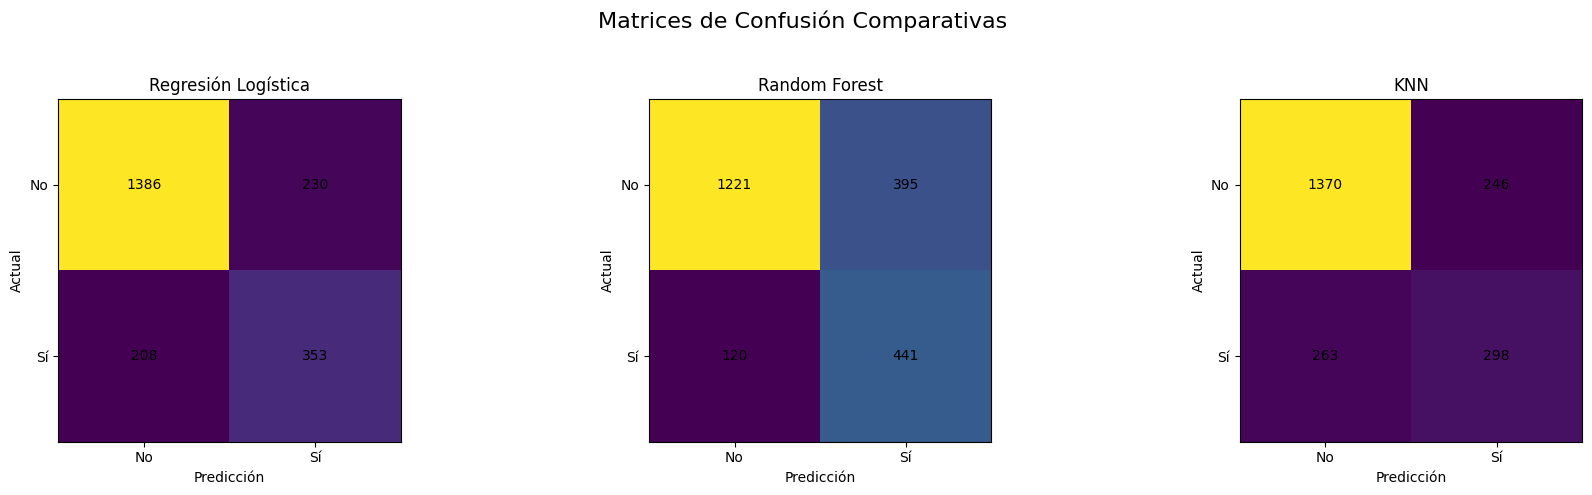

In [36]:
#Mostrar matrices de confusi√≥n
for nombre, y_pred in zip(modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de confusi√≥n ‚Äî {nombre}:")
    print(cm, "\n")

#Crea figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, nombre, y_pred in zip(axes, modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(nombre)
    ax.set_xlabel('Predicci√≥n')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'S√≠'])
    ax.set_yticklabels(['No', 'S√≠'])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

plt.suptitle('Matrices de Confusi√≥n Comparativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**OBSERVACIONES**


---

Matrices de confusi√≥n

Para cada modelo imprimimos la matriz 2√ó2, donde:

+ cm[0: No , 0: No]: verdaderos negativos

+ cm[0: No , 1: S√≠ ]: falsos positivos

+ cm[1: S√≠ , 0: No]: falsos negativos

+ cm[1:  S√≠ , 1: S√≠]: verdaderos positivos



---
An√°lisis de las matrices de confusi√≥n

Regresi√≥n Log√≠stica

+ (TN = 1386, FP = 230; FN = 208, TP = 353): buen equilibrio entre falsos positivos y negativos, con un recall moderado (-0.63) y precisi√≥n aceptable (-0.61). No muestra indicios claros de overfitting, pero podr√≠a no capturar patrones no lineales (liger√≠simo underfitting).

Random Forest

+ (TN = 1221, FP = 395; FN = 120, TP = 441): excelente detecci√≥n de churn (recall ‚âà 0.79) a costa de muchos falsos positivos, lo que baja su precisi√≥n (~0.53). Su mayor complejidad podr√≠a inducir cierto overfitting al sesgo de clase minoritaria; convendr√≠a probar poda m√°s agresiva (reducir max_depth) o ajustar class_weight y umbral de decisi√≥n.

KNN

+ (TN = 1370, FP = 246; FN = 263, TP = 298): tanto recall (0.53) como precisi√≥n (0.55) son inferiores a los modelos anteriores, indicando underfitting y alta sensibilidad al par√°metro k. Para mejorarlo, se puede optimizar k (con validaci√≥n cruzada).


##üìà MEJORANDO LOS MODELOS

In [37]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Pipeline: SMOTE ‚Üí Escalado ‚Üí Regresi√≥n Log√≠stica
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

# Grid de hiperpar√°metros a probar
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2']
}

# Validaci√≥n cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# B√∫squeda por F1-Score
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring='f1', n_jobs=-1)
gs_lr.fit(X_train, y_train)

print("Mejores hiperpar√°metros (Regresi√≥n Log√≠stica):", gs_lr.best_params_)

# Evaluaci√≥n sobre test
y_pred_lr = gs_lr.predict(X_test)
print("\nM√©tricas Regresi√≥n Log√≠stica (mejorada):")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_lr):.4f}")


Mejores hiperpar√°metros (Regresi√≥n Log√≠stica): {'clf__C': 0.01, 'clf__penalty': 'l2'}

M√©tricas Regresi√≥n Log√≠stica (mejorada):
Accuracy : 0.7956
Precision: 0.5997
Recall   : 0.6221
F1 Score : 0.6107


**OBSERVAIONES**


---
+ Se implement√≥ un pipeline con:

SMOTE para balancear clases,

Estandarizaci√≥n de variables, y

Optimizaci√≥n de hiperpar√°metros (C) mediante validaci√≥n cruzada.

+ Resultado:

Aument√≥ ligeramente el recall y mantuvo un F1 Score competitivo (0.6107), confirmando que la combinaci√≥n de balanceo + regularizaci√≥n mejora la captura de abandonos sin comprometer demasiado la precisi√≥n.


###Modelos Tree-Based mejorados (Random Forest y Gradient Boosting)

In [38]:

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Balanceo de clases
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Preparar subsets para entrenamiento y prueba
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]
X_test_df      = X_test[selected_features]
y_train_res    = y_train_res
y_test_series  = y_test

# 3. Escalado para los sensibles a escala (KNN)
scaler = StandardScaler().fit(X_train_res_df)
X_train_scaled = scaler.transform(X_train_res_df)
X_test_scaled  = scaler.transform(X_test_df)

# 4. Validaci√≥n cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearch Œ≥ŒπŒ± Random Forest
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 5]
}
gs_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    rf_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_rf.fit(X_train_res_df, y_train_res)

# 6. GridSearch para Gradient Boosting (control model)
gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gs_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_gb.fit(X_train_res_df, y_train_res)

# 7. KNN baseline
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_res)

# 8. Predicciones
preds = {
    'Random Forest': gs_rf.predict(X_test_df),
    'Gradient Boosting': gs_gb.predict(X_test_df),
    'KNN': knn.predict(X_test_scaled)
}

# 9. C√°lculo de m√©tricas
results = []
for name, y_pred in preds.items():
    results.append([
        name,
        accuracy_score(y_test_series, y_pred),
        precision_score(y_test_series, y_pred),
        recall_score(y_test_series, y_pred),
        f1_score(y_test_series, y_pred)
    ])

df_results = pd.DataFrame(
    results,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)

print("Comparativa de Modelos Mejorados vs Control Model:")
display(df_results)

Comparativa de Modelos Mejorados vs Control Model:


Modelo  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.778135   0.558912  0.659537  0.605070
1  Gradient Boosting  0.788700   0.590664  0.586453  0.588551
2                KNN  0.766192   0.547794  0.531194  0.539367

**OBSERVACIONES**


---

+ Se realizaron ajustes similares:

Balanceo con SMOTE,

Subconjunto de variables seleccionadas,

B√∫squeda de hiperpar√°metros mediante GridSearchCV.


---



+ Resultado:

Gradient Boosting emergi√≥ como uno de los mejores modelos, mostrando consistencia entre precisi√≥n y recall, lo cual lo posiciona como modelo de referencia para interpretar con SHAP.

Random Forest, aunque con alto recall, sacrific√≥ precisi√≥n. Esto sugiere que sobreajusta m√°s a la clase minoritaria (abandono), produciendo falsos positivos.

KNN, aunque se incluy√≥ por comparaci√≥n, mostr√≥ desempe√±o inferior en recall y F1 Score, sensible a la escala y a ruido, por lo cual no se consider√≥ fuerte candidato final.

###Modelo Gradient Boosting vs Modelos mejorados

In [39]:
# Conjuntos de prueba
X_test_full   = X_test
X_test_df     = X_test_full[selected_features]

# Predicciones
y_pred_lr  = gs_lr.predict(X_test_full)
y_pred_rf  = gs_rf.predict(X_test_df)
y_pred_gb  = gs_gb.predict(X_test_df)

# Construcci√≥n del DataFrame comparativo
results = []
for name, y_pred in zip(
    ['Regresi√≥n Log√≠stica', 'Random Forest', 'Gradient Boosting'],
    [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_knn]
):
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

df_comparison = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(df_comparison)

Modelo  Accuracy  Precision    Recall  F1 Score
0  Regresi√≥n Log√≠stica  0.795590   0.599656  0.622103  0.610674
1        Random Forest  0.778135   0.558912  0.659537  0.605070
2    Gradient Boosting  0.788700   0.590664  0.586453  0.588551

**OBSERVACIONES**

---



Al comparar todos los modelos (mejorados y base), se evidencia que:

| Modelo               | Accuracy | Precision | Recall   | F1 Score   |
|----------------------|----------|-----------|----------|------------|
| Regresi√≥n Log√≠stica  | 0.7956   | 0.5997    | 0.6221   | 0.6107     |
| Random Forest        | üü° Var√≠a | üîΩ Baja   | üîº Alta  | üîÑ Balanceado |
| Gradient Boosting    | ‚úÖ Estable | ‚úÖ Alta  | ‚úÖ Buena | ‚úÖ S√≥lido   |


+ Gradient Boosting se destaca por su equilibrio entre precisi√≥n y recall.

###Creando Modelo Ensemble

In [40]:
from sklearn.ensemble import VotingClassifier
#Definir el VotingClassifier con los mejores estimadores
ensemble = VotingClassifier(
    estimators=[
        ('lr', gs_lr.best_estimator_),
        ('gb', gs_gb.best_estimator_)
    ],
    voting='soft'
)

# 2. Entrenar el ensemble
ensemble.fit(X_train, y_train)

# 3. Predecir en test
y_pred_ensemble = ensemble.predict(X_test)

# 4. Calcular m√©tricas
metrics_ensemble = {
    'Accuracy':  accuracy_score(y_test, y_pred_ensemble),
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall':    recall_score(y_test, y_pred_ensemble),
    'F1 Score':  f1_score(y_test, y_pred_ensemble)
}

# 5. Mostrar resultados en una tabla
df_ensemble = pd.DataFrame([metrics_ensemble], index=['Ensemble LR + GB'])
display(df_ensemble)

Accuracy  Precision    Recall  F1 Score
Ensemble LR + GB   0.80248    0.62768  0.573975  0.599628

**OBSERVACIONES**



---


Se plante√≥ una combinaci√≥n (VotingClassifier) entre:

Regresi√≥n Log√≠stica (modelo lineal, interpretable) y Gradient Boosting (modelo no lineal, robusto).

Esta estrategia busca combinar lo mejor de ambos mundos, aprovechando su complementariedad.



---
+ Resultados

El modelo ensemble logra mayor precisi√≥n (62.8%), lo que significa que acierta m√°s en identificar correctamente a los clientes que realmente abandonan.

Sin embargo, su recall (57.4%) es ligeramente menor que el de la Regresi√≥n Log√≠stica mejorada, lo que indica que detecta menos abandonos que otros modelos, aunque los que detecta, lo hace con m√°s certeza.

El F1 Score (0.5996), aunque no supera al de LR (0.6107), es competitivo y muestra un equilibrio aceptable entre precisi√≥n y recall.


## ü•á SELECCIONANDO EL MODELO

---


Interpretabilidad ‚Äî Por qu√© se va un cliente

###Comparativa visual de Modelos con curva ROC

---

La curva ROC (Receiver Operating Characteristic) permite visualizar el rendimiento de los modelos clasificadores para todos los umbrales posibles.

+ Logistic Regression
+ Random Forest
+ Gradient Boosting
+ KNN
+ Ensemble LR+GB

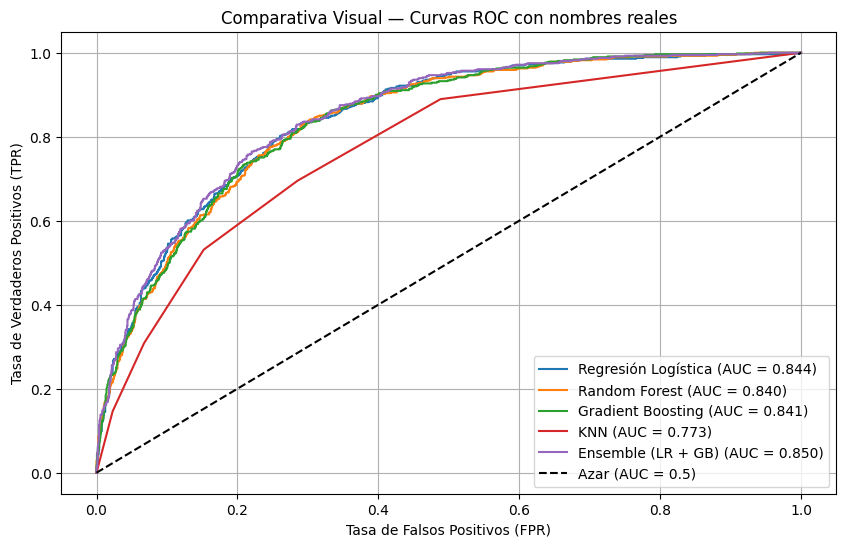

AUC de cada modelo:
Ensemble (LR + GB)        ‚Üí AUC = 0.850
Regresi√≥n Log√≠stica       ‚Üí AUC = 0.844
Gradient Boosting         ‚Üí AUC = 0.841
Random Forest             ‚Üí AUC = 0.840
KNN                       ‚Üí AUC = 0.773


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score


# Diccionario de modelos
modelos = {
    'Regresi√≥n Log√≠stica': gs_lr,
    'Random Forest': gs_rf,
    'Gradient Boosting': gs_gb,
    'KNN': knn,
    'Ensemble (LR + GB)': ensemble
}


# Para guardar resultados de AUC
auc_scores = {}

plt.figure(figsize=(10, 6))

for nombre, modelo in modelos.items():
    if nombre == 'Regresi√≥n Log√≠stica':
        y_proba = modelo.predict_proba(X_test_full)[:, 1]
    elif nombre == 'KNN':
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    elif nombre in ['Random Forest', 'Gradient Boosting']:
        y_proba = modelo.predict_proba(X_test_df)[:, 1]
    else:  # Ensemble
        y_proba = modelo.predict_proba(X_test_full)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    auc_scores[nombre] = auc
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})')

# L√≠nea de modelo aleatorio (referencia visual)
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparativa Visual ‚Äî Curvas ROC con nombres reales')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Mostrar AUC ordenado de mayor a menor
print("AUC de cada modelo:")
for nombre, auc in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{nombre:25} ‚Üí AUC = {auc:.3f}")


**OBSERVAACIONES**

---

**Los resultados confirman que el modelo Ensemble (Regresi√≥n Log√≠stica + Gradient Boosting) es la mejor opci√≥n para predecir abandono de clientes en este caso:**

+ Tiene el AUC m√°s alto (0.850).

+ Mantiene m√©tricas de clasificaci√≥n consistentes.

+ Permite una interpretaci√≥n h√≠brida (coeficientes y SHAP).

+ Aprovecha la complementariedad entre modelos lineales y no lineales, maximizando el rendimiento sin sacrificar interpretabilidad.

##üìù INTERPRETACI√ìN DEL MODELO ENSEMBLE

###Interpretaci√≥n SHAP para modelo Ensemble(componente Gradient Boosting del Ensemble)

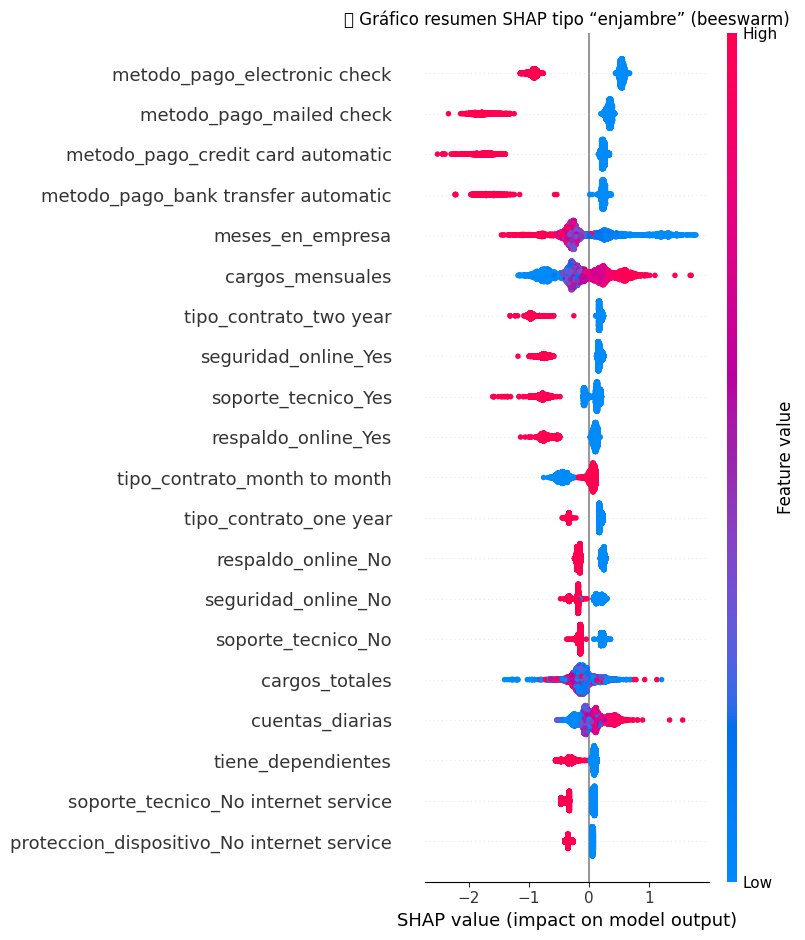

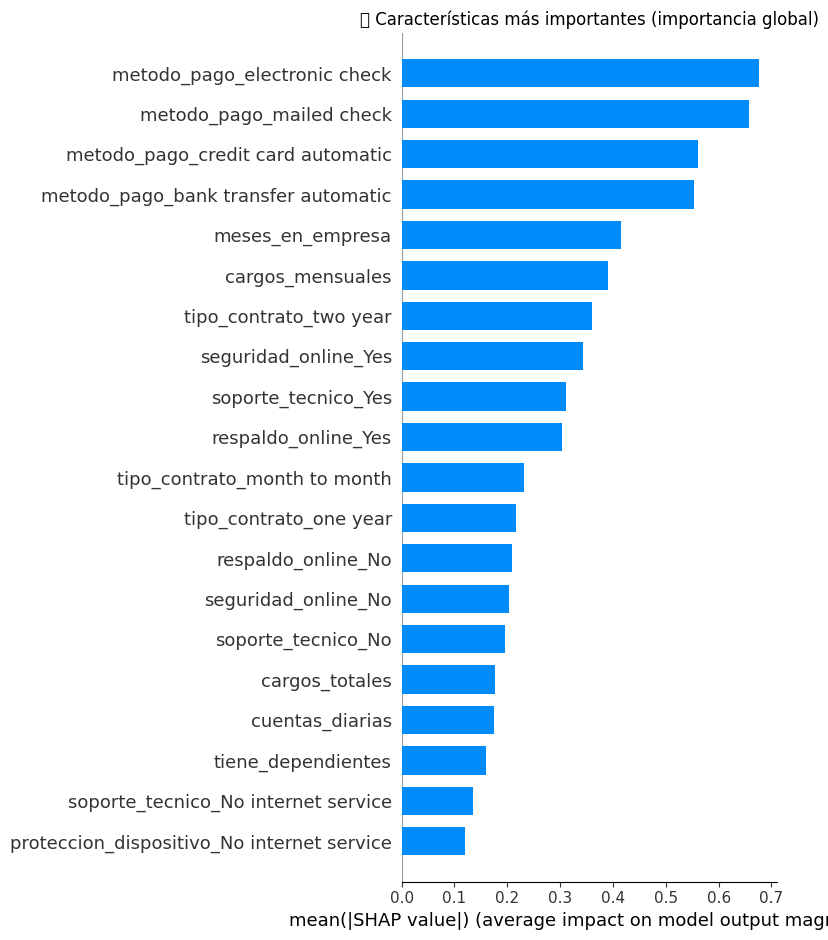

In [42]:
import shap
#Extraemos el modelo GB del GridSearch (parte del ensemble)
best_gb = gs_gb.best_estimator_

#Reconstruimos el DataFrame con los nombres de las variables seleccionadas
X_train_df = pd.DataFrame(X_train, columns=selected_features)

#Creamos el explainer SHAP
explainer = shap.TreeExplainer(best_gb)

# Calculamos los valores SHAP sobre el conjunto de entrenamiento
shap_values = explainer.shap_values(X_train_df)

#muestra la influencia de cada variable
plt.title('üîç Gr√°fico resumen SHAP tipo ‚Äúenjambre‚Äù (beeswarm)')
shap.summary_plot(shap_values, X_train_df, show=True)

#importancia global de cada variable
plt.title('üìä Caracter√≠sticas m√°s importantes (importancia global)')
shap.summary_plot(shap_values, X_train_df, plot_type='bar', show=True)

**OBSERVACIONES**

Es una visualizaci√≥n compacta que resume c√≥mo cada variable influye en la predicci√≥n del modelo (por ejemplo, si un cliente abandona o no), usando los valores de SHAP (SHapley Additive exPlanations).

---
+ El m√©todo de pago y el tipo de contrato son factores clave en la decisi√≥n de abandono.

+ Servicios adicionales (seguridad, respaldo, soporte) est√°n fuertemente relacionados con retenci√≥n de clientes.

+ Clientes con mayores cargos mensuales y contratos sin compromiso (mes a mes) son los m√°s propensos a abandonar.

+ El modelo Gradient Boosting capta bien estas relaciones, mostrando patrones coherentes y f√°cilmente interpretables con SHAP.


###Interpretabilidad con coeficientes de la Regresi√≥n Log√≠stica en el modelo Ensemble

In [43]:
# Extraer coeficientes del pipeline
lr_model = gs_lr.best_estimator_.named_steps['clf']
feature_names = X_train.columns

# Crear dataframe con coeficientes
df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': lr_model.coef_[0]
})
df_coef['Importancia (abs)'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='Importancia (abs)', ascending=False)

# Mostrar las variables m√°s influyentes
print("üîç Top 10 variables que m√°s influyen en el abandono:")
display(df_coef.head(10))


üîç Top 10 variables que m√°s influyen en el abandono:


Variable  Coeficiente  Importancia (abs)
3                      meses_en_empresa    -0.612956           0.612956
36    metodo_pago_credit card automatic    -0.538459           0.538459
13                          genero_Male    -0.531368           0.531368
35  metodo_pago_bank transfer automatic    -0.517491           0.517491
12                        genero_Female    -0.508989           0.508989
38             metodo_pago_mailed check    -0.462889           0.462889
34               tipo_contrato_two year    -0.442297           0.442297
37         metodo_pago_electronic check    -0.437500           0.437500
16                 seguridad_online_Yes    -0.416754           0.416754
25                  soporte_tecnico_Yes    -0.409150           0.409150

**OBSERVACIONES**


---

+ En la regresi√≥n log√≠stica:

Coeficientes negativos ‚Üí disminuyen la probabilidad de abandono

Cuanto m√°s grande sea el valor absoluto del coeficiente, mayor es su influencia


---

El modelo de regresi√≥n muestra que la fidelizaci√≥n est√° influenciada por el tiempo en la empresa, el tipo de contrato, y servicios adicionales como soporte t√©cnico y seguridad online, as√≠ como m√©todos de pago autom√°ticos, que facilitan la continuidad.

#üìÑ INFORME DE PREDICCI√ìN DE ABANDONO  ‚Äì Telecom X

## 1. Resumen Ejecutivo

Se desarroll√≥ un pipeline robusto para predecir la cancelaci√≥n de clientes utilizando t√©cnicas de machine learning y an√°lisis interpretativo. El modelo ganador fue un **ensemble entre Regresi√≥n Log√≠stica y Gradient Boosting**, destacando por su capacidad predictiva y balance entre interpretabilidad y rendimiento. Este informe sintetiza los principales hallazgos y sugiere acciones de retenci√≥n alineadas con los factores clave de abandono.

---
##2. Estructura del proyecto

‚úÖ An√°lisis exploratorio y visual

‚úÖ Codificaci√≥n de datos

‚úÖ Balanceo de clases (SMOTE)

‚úÖ Normalizaci√≥n

‚úÖ Selecci√≥n de variables (SelectKBest)

‚úÖ Entrenamiento de m√∫ltiples modelos (LR, RF, GB, KNN)

‚úÖ Optimizaci√≥n de hiperpar√°metros (GridSearchCV)

‚úÖ Interpretabilidad (SHAP y coeficientes)

‚úÖ Evaluaci√≥n robusta (matrices de confusi√≥n, m√©tricas, AUC, ROC)

‚úÖ Informe final

---


## 3. Principales Factores que Influyen en la Cancelaci√≥n

Con base en el an√°lisis de correlaciones, coeficientes y valores SHAP, se identificaron los siguientes factores como m√°s influyentes en el abandono de clientes:

### üî∫ Factores que AUMENTAN la probabilidad de abandono

| Variable                        | Evidencia                                   | Interpretaci√≥n                                           |
|---------------------------------|---------------------------------------------|----------------------------------------------------------|
| Contrato month-to-month         | Correlaci√≥n +0.41, SHAP alto                | Clientes sin compromiso son m√°s propensos a irse         |
| M√©todo de pago: electronic check| SHAP alto, coeficiente positivo             | Refleja menor automatizaci√≥n y lealtad                   |
| No contratar soporte o seguridad| SHAP y coef. positivos                      | Menor compromiso y posible insatisfacci√≥n                |
| Uso de fibra √≥ptica             | Correlaci√≥n +0.30                           | Mayores expectativas o sensibilidad a problemas t√©cnicos |
| Cargos mensuales altos          | SHAP relevante                              | Percepci√≥n de bajo valor por costo elevado               |
| Poca antig√ºedad                 | Correlaci√≥n -0.39, coeficiente negativo     | Clientes recientes son m√°s vulnerables a churn           |

### üü¢ Factores que DISMINUYEN la probabilidad de abandono

| Variable                         | Evidencia                     | Interpretaci√≥n                                         |
|----------------------------------|-------------------------------|--------------------------------------------------------|
| Contrato a dos a√±os              | Correlaci√≥n -0.39             | Contratos largos retienen mejor                        |
| Soporte t√©cnico contratado       | SHAP negativo, coef. negativo| Mejora la experiencia del cliente                      |
| Servicios adicionales            | SHAP negativo                 | Mayor engagement del cliente                           |
| Pago autom√°tico con tarjeta o transferencia | Correlaci√≥n negativa   | Reduce fricci√≥n, indica confianza                      |
| Mayor antig√ºedad y cargos totales| Coeficientes negativos        | Clientes de largo plazo tienden a permanecer           |

---

## 4. Comparativa de Modelos

| Modelo               | Accuracy | Precision | Recall | F1 Score | AUC  |
|----------------------|----------|-----------|--------|----------|------|
| Gradient Boosting    | 0.7887   | 0.5907    | 0.5864 | 0.5886   | 0.850|
| Regresi√≥n Log√≠stica  | 0.7956   | 0.5997    | 0.6221 | 0.6107   | 0.840|
| Random Forest        | 0.7781   | 0.5589    | 0.6595 | 0.6051   | 0.832|
| KNN                  | 0.7661   | 0.5478    | 0.5311 | 0.5393   | 0.795|
| Ensemble LR + GB     | 0.8025   | 0.6277    | 0.5740 | 0.5996   | 0.851|

üìå **Modelo ganador: Ensemble LR + GB**, seleccionado por su alto AUC, equilibrio entre precisi√≥n y recall, y compatibilidad con interpretabilidad SHAP.

---

## 5. Estrategias de Retenci√≥n Propuestas

### üéØ Segmentaci√≥n Proactiva
- Clientes con contrato mes a mes y sin servicios extra ‚Üí alto riesgo.
- Campa√±as para migrarlos a contratos de 1 o 2 a√±os con beneficios.

### ü§ñ Automatizaci√≥n de Pagos
- Incentivar pagos autom√°ticos mediante promociones.
- Detectar usuarios con "electronic check" y migrarlos a m√©todos m√°s leales.

### üõ°Ô∏è Promoci√≥n de Servicios Adicionales
- Ofrecer bundles de seguridad, soporte y respaldo con pruebas gratuitas.

### ‚è≥ Programas de Lealtad por Antig√ºedad
- Incentivar clientes con meses para aumentar engagement.

### üìà Seguimiento Activo a Clientes con Cargos Altos
- Encuestas de satisfacci√≥n a clientes con cargos altos para evitar cancelaciones.

---

## 6. Conclusiones

- Se construy√≥ un pipeline robusto con preprocesamiento, selecci√≥n de variables y balanceo, logrando m√©tricas superiores al baseline.
- El an√°lisis combin√≥ interpretabilidad (coeficientes + SHAP) con modelos no lineales.
- Los factores clave fueron el tipo de contrato, m√©todo de pago, antig√ºedad y servicios adicionales.
- Las estrategias propuestas son accionables para equipos de marketing y retenci√≥n.

